In [ ]:
# Coding up the circular slepians

In [3]:
using SpecialFunctions, FFTW, Plots, LinearAlgebra

# besselj(nu,z)

In [50]:
# Equation (77) - circular bandlimitation and circular spacelimitation
function phi77(l, m, dl, gamma, c, zeta, lmax)
    (factorial(m)/gamma)*mapreduce(l -> (dl[l]*factorial(l)/factorial(l+m)) * besselj(m + 2 * l + 1, c * zeta), sum, 0:lmax)
end

function constructT78(m, lmax, c)
    superdiag = -map(l -> c^2 * (m + l + 1)^2/((2 * l + m + 1) * (2 * l + m + 2)), 0:(lmax - 1))
    diagn = map(l -> (2*l + m + 0.5)*(2*l+m+1.5) + c^2/2*(1 + m^2/((2*l+m)*(2*l+m+2))), 0:lmax)
    subdiag = -map(l -> c^2 * (l + 1)^2/((2 * l + m + 2) * (2 * l + m + 3)), 0:(lmax - 1))
    Matrix(Tridiagonal(subdiag, diagn, superdiag))
end

function dlfun(m, lmax, c)
    eigen(constructT78(m, lmax, c)).vectors
end

function gam(m, lmax, c)
    dls = dlfun(m, lmax, c)
    (c^(m + 0.5) * dls[:, 1])/(2^(m + 1) * factorial(m + 1)) ./ sum(dls, dims = 2)
end

function lam(m, lmax, c, N2D)
    2 * gam(m, lmax, c) * sqrt(N2D)
end


lam (generic function with 2 methods)

In [52]:
lam(15, 40, 0.1, 640)

41×1 Array{Float64,2}:
  1.1667031079778245e-32
 -5.6084719646032436e-39
 -4.143820904981168e-45
 -3.602443162856321e-51
  3.3343826126227566e-57
 -3.127182586489963e-63
  2.8913603717900126e-69
 -2.592909146621451e-75
  2.2328294132571975e-81
 -1.834817875227405e-87
  1.4332424771231976e-93
 -1.0617707054270745e-99
  7.450282956194788e-106
  ⋮
 -6.4097635181254675e-214
  1.8503778381134067e-220
 -5.125173831602159e-227
  1.3630722573341635e-233
 -3.483484674394111e-240
  8.560650931991664e-247
 -2.024423144622976e-253
  4.609905826467166e-260
 -1.0114975152818844e-266
  2.1399160097304833e-273
 -4.367737837377725e-280
  8.606148007779095e-287

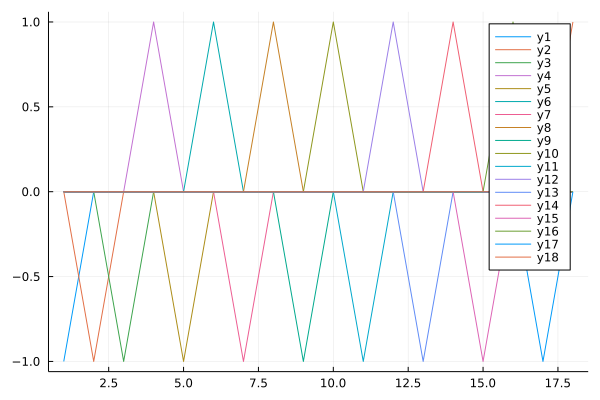

In [40]:
plot((EV))